In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


# Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of many passengers and crew.

No. of variables/columns in the dataset - 12

No. of records/rows in the dataset - 891 

In [155]:
train_df=pd.read_csv("/kaggle/input/titanic/train.csv")#reading the csv file
print("Information on the Dataset")
print(train_df.info())


Information on the Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Exploratory Data Analysis

**Columns** -:
* PassengerId – Id allotted to a particular passenger
* Survived – This column states whether a passenger has survived(value=1) or not (value=0)
* Pclass – It indicates the socio-economic status of ticket purchased. 1 – Upper, 2 – Middle, 3 – Lower. 
* Name – name of the passenger
* Sex – gender of the passenger
* Age – age of the passenger
* SibSp – number of sibling or spouses who boarded the ship
* Parch – number of parents or children who boarded the ship
* Ticket – Ticket number
* Fare – Passenger fare
* Cabin – Cabin number
* Embarked – Port of embarkation. C=Cherbourg, Q=Queenstown, S = Southampton


In [156]:
train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data cleaning is the process of handling missing values in the dataset.
Age,Cabin and Embarked has Null values.

In [157]:
train_df.Age.value_counts()


24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [158]:
train_df.Age=train_df.Age.interpolate()#takes avg of vlues in cell above and below it.
    

In [159]:
train_df.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
D              3
              ..
C91            1
E17            1
B94            1
E58            1
D6             1
Name: Cabin, Length: 147, dtype: int64

In [160]:
train_df.drop(['Cabin'],inplace=True,axis=1)#has a lot of Null values and is not of much relevance to us.

In [161]:
train_df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [162]:
train_df.Embarked=train_df.Embarked.fillna('S')#Since max no. of passengers boarded at S.

In [163]:
print(train_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [164]:
train_df.drop(['Name'],inplace=True,axis=1)
train_df.drop(['Ticket'],inplace=True,axis=1)
#these columns can be dropped

In [165]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.726061,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.902353,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [166]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

# Graph Visualization

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


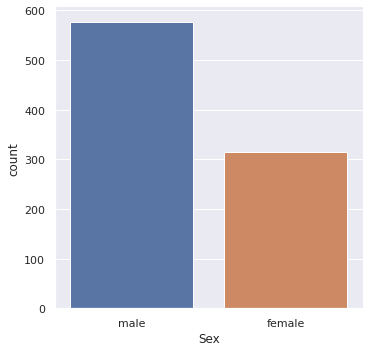

In [167]:
#Gender of passengers on titanics
sns.factorplot('Sex',data=train_df,kind='count')

There are more male passengers than female passengers.

In [168]:
#Now let's find the children among the passengers.
def titanic_children(passenger):
    
    age , sex = passenger
    if age <18:
        return 'child'
    else:
        return sex
train_df['Person'] = train_df[['Age','Sex']].apply(titanic_children,axis=1)
#if a passenger's age<18 to a column called Person, it saves as child. Else as female/male

In [169]:
train_df.Person.value_counts()

male      500
female    255
child     136
Name: Person, dtype: int64

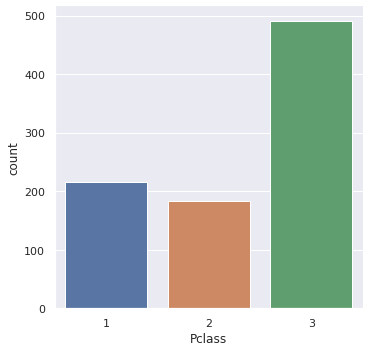

In [170]:
#no. of people in each passenger class
sns.factorplot('Pclass',data=train_df,kind='count')

Maximum no. of people were in passenger class 3 and the least were in passenger class 2.

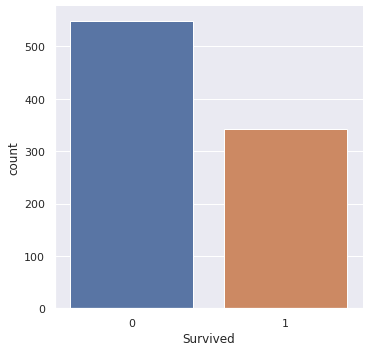

In [171]:
#visualize the survival
sns.factorplot('Survived',data=train_df,kind='count')

Passengers were more likely to die than survive.

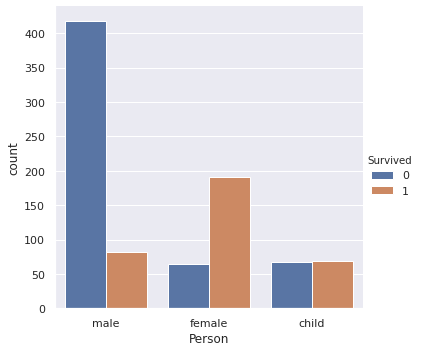

In [172]:
#Survival among people
sns.factorplot('Person',data=train_df,hue='Survived',kind='count')

Male passengers were more likely to die whereas female passengers were more likely to survive.

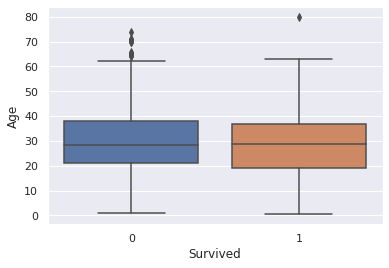

In [173]:
sns.boxplot(x='Survived',y='Age',data=train_df)#to see how age affects survival 

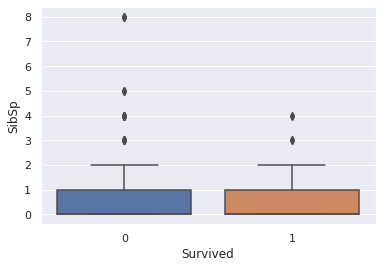

In [174]:
sns.boxplot(x='Survived',y='SibSp',data=train_df)#to see whether having sibling/spouse affects survival

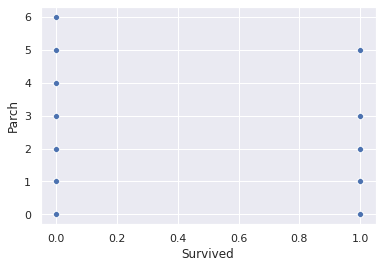

In [175]:
sns.scatterplot(x='Survived',y='Parch',data=train_df)#whether having parents/children affects survival

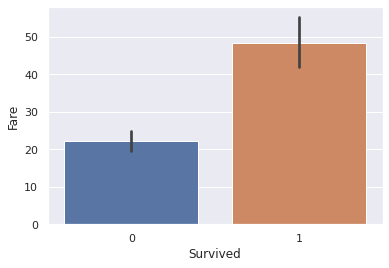

In [176]:
sns.barplot(x='Survived',y='Fare',data=train_df)#whether cost of ticket depends on survival

Passengers who payed a greater fare were more likely to survive.

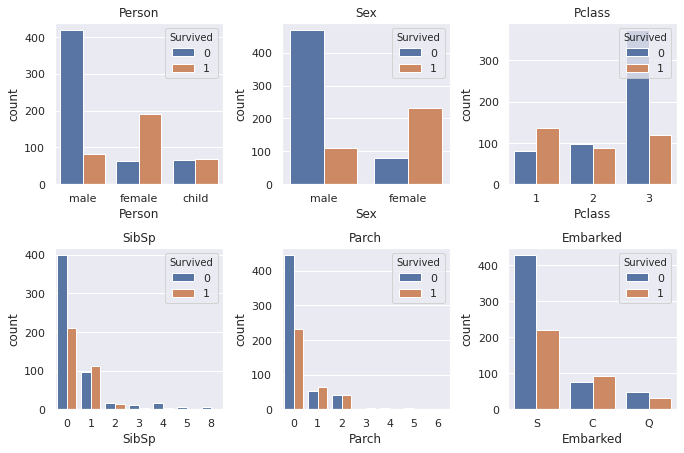

In [177]:
#visualize the count of survivors in 'Person','Sex','Pclass','Sibsp','Parch','Embarked'

cols=['Person','Sex','Pclass','SibSp','Parch','Embarked']

n_rows=2
n_cols=3

#The subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols + c #variable to go through no. of columns
        ax=axs[r][c] #shows where to position each subplot
        sns.countplot(train_df[cols[i]],hue=train_df['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
        
plt.tight_layout()

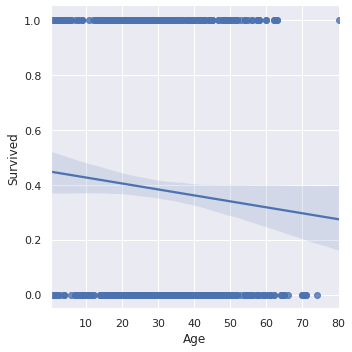

In [178]:
sns.lmplot('Age','Survived',data=train_df)

shows that grater the age, lesser the survival

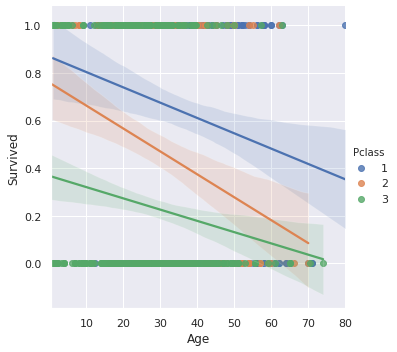

In [179]:
sns.lmplot('Age','Survived',data=train_df,hue='Pclass')

Shows that grater the age and the passenger class, lesser the survival.
For example, an old person in Pclass 3, is least likely to survive.

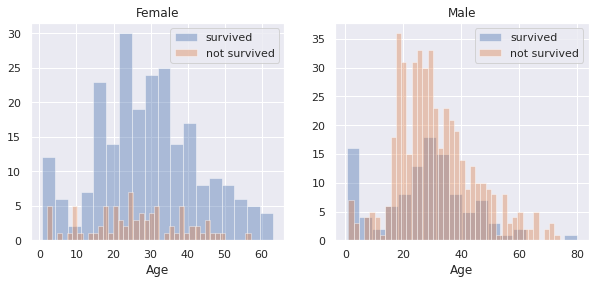

In [180]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

Female passengers have a high probability of survival when they are between 15 to 45 years old.
Male passengers' survival chances are least if they are between 20-40 years old.

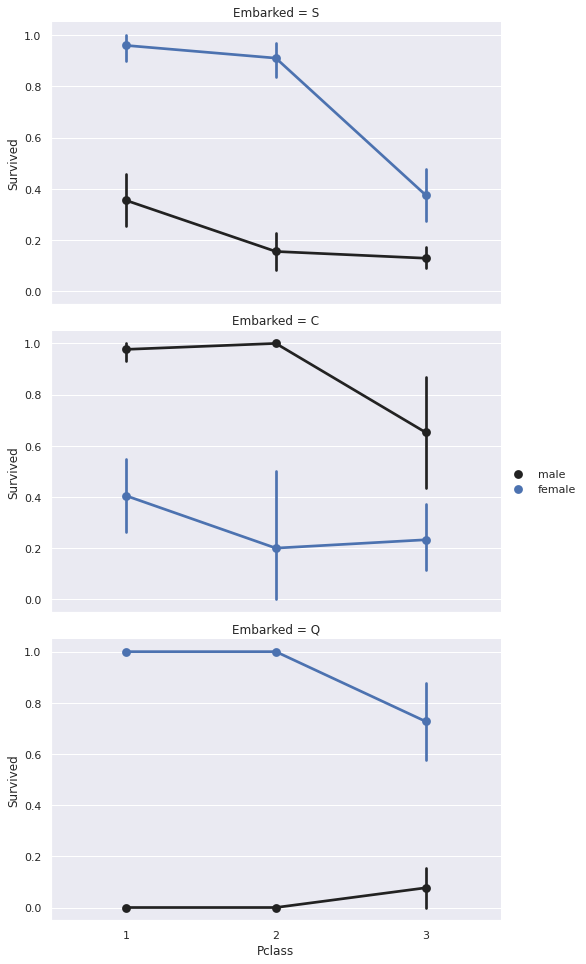

In [181]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Women who boarded on port Queenstown and on port Southampton have a higher chance of survival.
Men have a high survival probability if they boarded on port Cherbourg, but a low probability if they boarded on port Queenstown or Southampton.

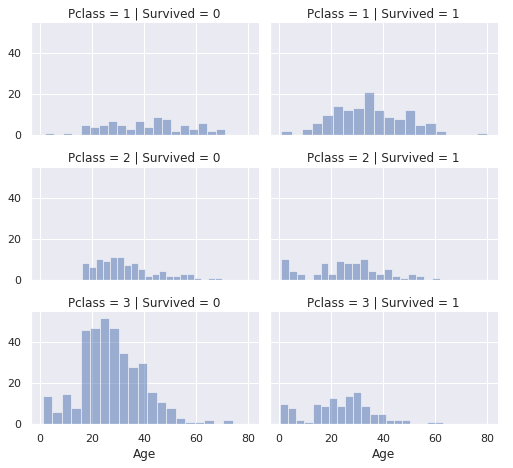

In [182]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

The above plots show high probability that a person in pclass 3 will not survive.

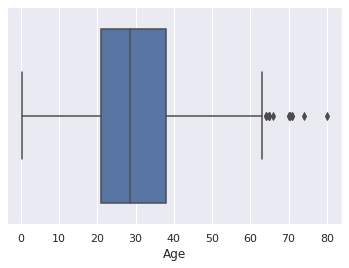

In [183]:
sns.boxplot('Age',data=train_df)#before removing the outliers

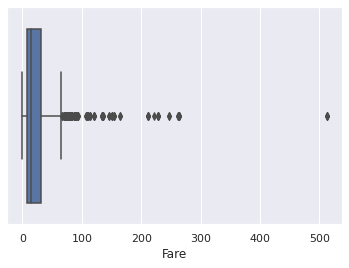

In [184]:
sns.boxplot('Fare',data=train_df)#before removing the outliers in fare

In [185]:
Q1 = train_df['Age'].quantile(0.25)
Q3 = train_df['Age'].quantile(0.75)
q1 = train_df['Fare'].quantile(0.25)
q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1
iqr = q3 - q1
print(IQR)#inter quartile range of Age
print(iqr)#inter quartile range of Fare
train_df = train_df[~((train_df['Age'] < (Q1 - 1.5 * IQR)) |(train_df['Age'] > (Q3 + 1.5 * IQR)))]
train_df = train_df[~((train_df['Fare'] < (q1 - 1.5 * iqr)) |(train_df['Fare'] > (q3 + 1.5 * iqr)))]
train_df.head()

17.0
23.0896


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,male,22.0,1,0,7.2500,S,male
2,3,1,3,female,26.0,0,0,7.9250,S,female
3,4,1,1,female,35.0,1,0,53.1000,S,female
4,5,0,3,male,35.0,0,0,8.0500,S,male
5,6,0,3,male,44.5,0,0,8.4583,Q,male


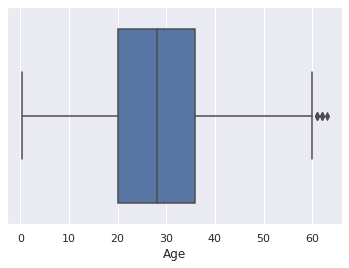

In [186]:
sns.boxplot('Age',data=train_df)#after removing the outliers

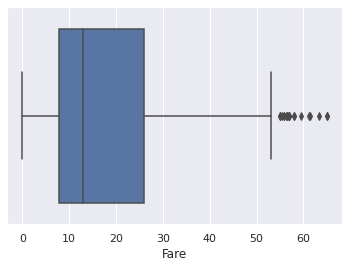

In [187]:
sns.boxplot('Fare',data=train_df)#after removing the outliers

In [188]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 763 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  763 non-null    int64  
 1   Survived     763 non-null    int64  
 2   Pclass       763 non-null    int64  
 3   Sex          763 non-null    object 
 4   Age          763 non-null    float64
 5   SibSp        763 non-null    int64  
 6   Parch        763 non-null    int64  
 7   Fare         763 non-null    float64
 8   Embarked     763 non-null    object 
 9   Person       763 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 65.6+ KB
None


In [189]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,447.138925,0.343381,2.490170,28.512066,0.444299,0.344692,17.734086
std,259.726399,0.475149,0.726943,12.879307,0.905207,0.790649,13.489439
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,216.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,450.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,671.500000,1.000000,3.000000,36.000000,1.000000,0.000000,26.000000
max,891.000000,1.000000,3.000000,63.000000,5.000000,6.000000,65.000000


# Normalization and Standardization


**Normalization**

Normalization is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

Various normalization techniques exist such as Min-Max Scalar and Robust Scalar. We will be using Min-Max Scalar because we have already removed outliers from our dataset.

**Standardization**

Standardization is useful when the data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis. It helps in multivariate analysis when you want all the variables to be in comparative units.

The result of standardization is that the features/variables will be rescaled so that they have the properties of a standard normal distribution with μ=0 and σ=1.

In the dataset, 'Age', is a count and 'Fare'(price in dollars). So it would be useful to standardize and normalize these columns so that they can be brought to a standard scale. This will help us to work with these columns and make meaningful comparision between them.

**Min-Max Scalar**

                            𝑋𝑛𝑜𝑟𝑚=(𝑋−𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛)
 
**Z-score normalization**

                                𝑧=(𝑥−μ)/σ
                                
where: z is z-score
   x is the data
   μ is the mean
   σ is the standard deviation

In [190]:
# Selecting only the numeric attributes for z-score normalization
num_attr = train_df.select_dtypes(include=['float64'])
num_attr

,Age,Fare
0,22.0,7.2500
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
5,44.5,8.4583
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,22.5,23.4500
889,26.0,30.0000


In [191]:
cols=['Age','Fare']
col_dict={}
for i in cols:
    std = train_df.iloc[:763][i].std()
    var = train_df.iloc[:763][i].var()
    mean =train_df.iloc[:763][i].mean()
    col_dict[i]=[mean,std,var]
col_dict

{'Age': [28.512066404543468, 12.879306744162296, 165.87654221022441],
 'Fare': [17.734086107470503, 13.48943873834859, 181.9649574756596]}

Above is the mean, standard deviation and variance for each of the columns **Age, Fare** 

In [192]:
std_scale = preprocessing.StandardScaler().fit(num_attr)
std_df = std_scale.transform(num_attr)
minmax_scale = preprocessing.MinMaxScaler().fit(std_df)
minmax_df = minmax_scale.transform(std_df)
minmax_df

array([[0.34483861, 0.11153846],
       [0.40875679, 0.12192308],
       [0.55257271, 0.81692308],
       ...,
       [0.35282838, 0.36076923],
       [0.40875679, 0.46153846],
       [0.50463407, 0.11923077]])

In [193]:
print("Dataset After standardization:\n")
print("Means:", std_df.mean(axis=0), end="\n\n")
print("Standard deviations:", std_df.std(axis=0), end="\n\n")
print("Min values:", std_df.min(axis=0), end="\n\n")
print("Max values:", std_df.max(axis=0), end="\n\n")

Dataset After standardization:

Means: [7.91561370e-17 5.58749202e-17]

Standard deviations: [1. 1.]

Min values: [-2.18260921 -1.31552685]

Max values: [2.67953522 3.50621838]



In [194]:
print("Dataset After normalisation:\n")
print("Means:", minmax_df.mean(axis=0), end="\n\n")
print("Standard deviations:", minmax_df.std(axis=0), end="\n\n")
print("Min values:", minmax_df.min(axis=0), end="\n\n")
print("Max values:", minmax_df.max(axis=0), end="\n\n")

Dataset After normalisation:

Means: [0.44889847 0.27283209]

Standard deviations: [0.20567057 0.20739379]

Min values: [0. 0.]

Max values: [1. 1.]



In [195]:
minmax_df = pd.DataFrame(minmax_df, columns=["Age", "Fare",])
minmax_df

,Age,Fare
0,0.344839,0.111538
1,0.408757,0.121923
2,0.552573,0.816923
3,0.552573,0.123846
4,0.704378,0.130128
...,...,...
758,0.424736,0.200000
759,0.296900,0.461538
760,0.352828,0.360769
761,0.408757,0.461538


Text(0.5, 1.0, 'Fare')

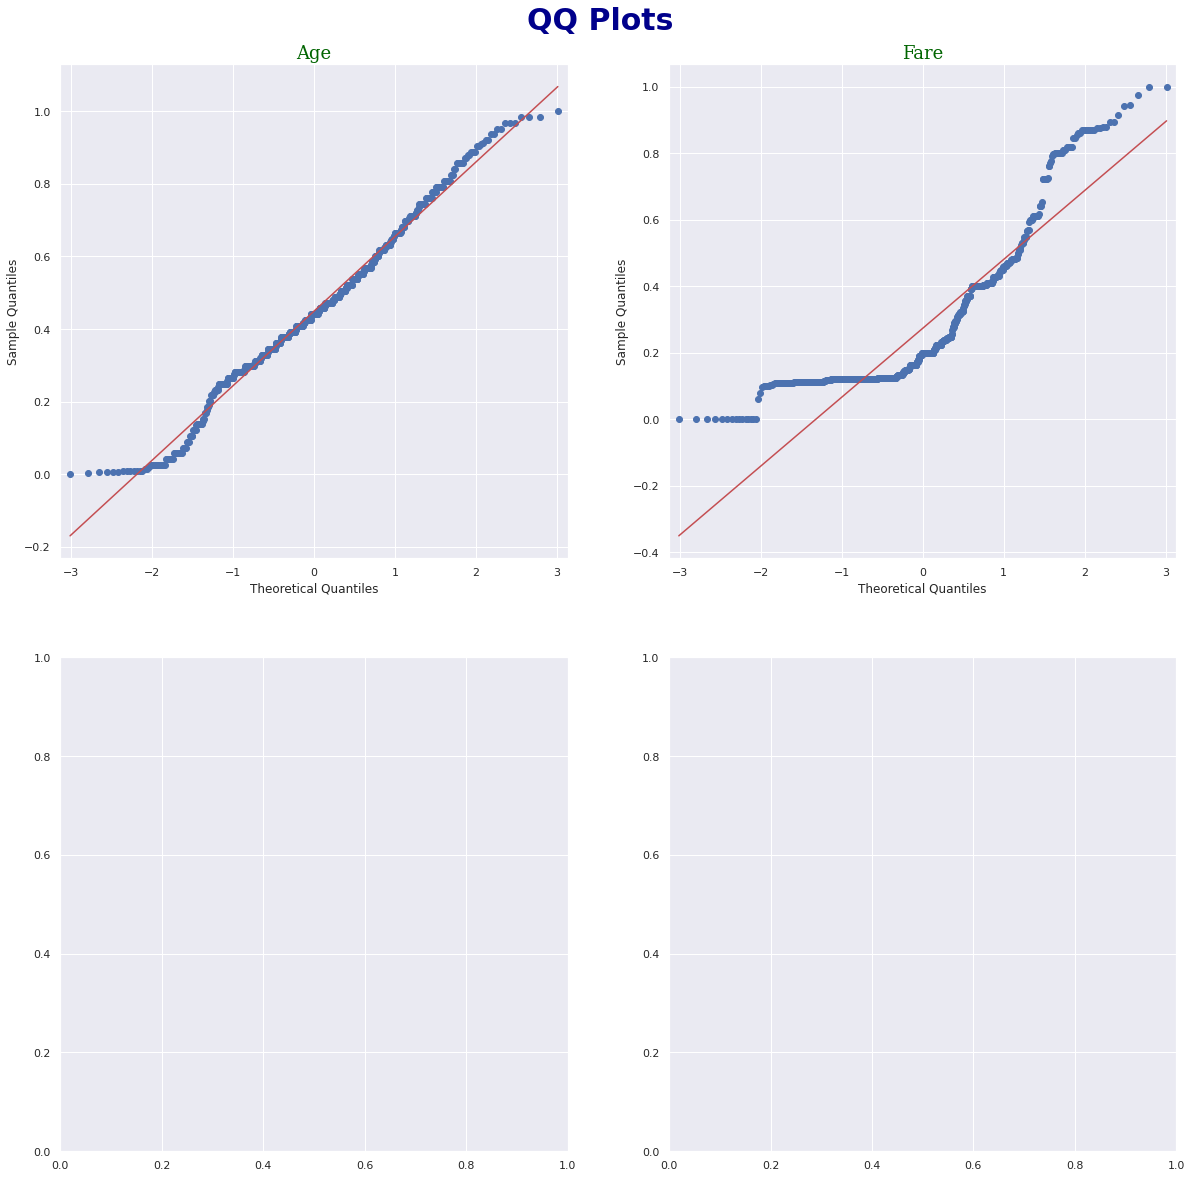

In [196]:
sns.set(color_codes=True)
font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 18,
        }

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
plt.suptitle("QQ Plots", x=0.5, y=0.92, size=30, weight="bold", color="darkblue")

qqplot(minmax_df["Age"], line='s', ax=ax[0][0])
ax[0][0].set_title("Age", fontdict=font)

qqplot(minmax_df["Fare"], line='s', ax=ax[0][1])
ax[0][1].set_title("Fare", fontdict=font)

From the qq plots above, we can infer that none of the variables have a normal distribution.

Although, age shows distributions very close to the straight line it deviates near the tail which might indicate that the distribution is not normal.

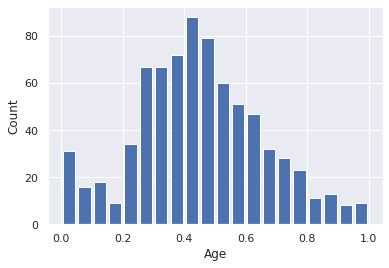

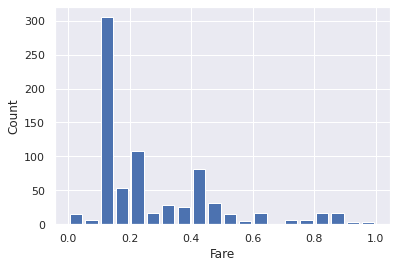

In [197]:
plt.hist(minmax_df.Age,bins=20,rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
plt.hist(minmax_df.Fare,bins=20,rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [198]:
train_df#before normalization and standardization

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,male,22.0,1,0,7.2500,S,male
2,3,1,3,female,26.0,0,0,7.9250,S,female
3,4,1,1,female,35.0,1,0,53.1000,S,female
4,5,0,3,male,35.0,0,0,8.0500,S,male
5,6,0,3,male,44.5,0,0,8.4583,Q,male
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,male
887,888,1,1,female,19.0,0,0,30.0000,S,female
888,889,0,3,female,22.5,1,2,23.4500,S,female
889,890,1,1,male,26.0,0,0,30.0000,C,male


In [199]:
#after normalization and standardization
train_df['Age']=minmax_df['Age'].values
train_df['Fare']=minmax_df['Fare'].values
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Person
0,1,0,3,male,0.344839,1,0,0.111538,S,male
2,3,1,3,female,0.408757,0,0,0.121923,S,female
3,4,1,1,female,0.552573,1,0,0.816923,S,female
4,5,0,3,male,0.552573,0,0,0.123846,S,male
5,6,0,3,male,0.704378,0,0,0.130128,Q,male
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,0.424736,0,0,0.200000,S,male
887,888,1,1,female,0.296900,0,0,0.461538,S,female
888,889,0,3,female,0.352828,1,2,0.360769,S,female
889,890,1,1,male,0.408757,0,0,0.461538,C,male


# **HYPOTHESIS TESTING**

**Research Hypothesis**: The proportion of female passengers onboard who survived the sinking of the Titanic was higher than the proportion of males passenegers onboard who survived the sinking of the Titanic.

**Null Hypothesis**: There is no relation between the 'Sex' and 'Survived' variables.

**Alternative hypothesis**: There is a relation between the 'Sex' and 'Survived' variables.

In [200]:
from scipy.stats import chi2_contingency

In [201]:
data = pd.DataFrame(train_df, columns=['PassengerId','Survived','Person',])
data.head()

,PassengerId,Survived,Person
0,1,0,male
2,3,1,female
3,4,1,female
4,5,0,male
5,6,0,male


In [202]:
gender_survd = pd.pivot_table(data,index=['Person'],columns=['Survived'],aggfunc=len)
gender_survd

PassengerId     
Survived           0    1
Person                   
child             66   58
female            60  133
male             375   71

Since, the data type of our features to be tested and the target variable are both of categorical type we can use 
**Chi-Squared test**.

In [203]:
gender_pivot=pd.pivot_table(data=train_df[['Survived','Person']],index='Survived',columns=['Person'],aggfunc=len)
chi2,p_value,dof,expected=chi2_contingency(gender_pivot)
print("Results of chi_squared test on gender to survival :")
print("Chi-Squared score =%s"%str(chi2))
print ("pvalue=%s\n"%str(p_value))

Results of chi_squared test on gender to survival :
Chi-Squared score =177.93293973476872
pvalue=2.3033135484113575e-39



**As the p-value is very small(p<0.05) we can reject our Null hypothesis.**

# Correlation

There are 2 types of correlation.

**POSITIVE CORRELATION** - If an increase in feature A leads to increase in feature B, then they are positively correlated. A value of 1 indicates perfect positive correlation.

**NEGATIVE CORRELATION** - If an increase in feature A leads to decrease in feature B, then they are negatively correlated. A value of -1 indicates perfect negative correlation.

In [204]:
train_df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.030471,-0.049600,0.023664,-0.083852,-0.015028,0.007829
Survived,-0.030471,1.000000,-0.248574,-0.084492,-0.007342,0.096731,0.241224
Pclass,-0.049600,-0.248574,1.000000,-0.301753,0.109353,0.082393,-0.583130
Age,0.023664,-0.084492,-0.301753,1.000000,-0.319593,-0.202324,0.039747
SibSp,-0.083852,-0.007342,0.109353,-0.319593,1.000000,0.409175,0.379653
Parch,-0.015028,0.096731,0.082393,-0.202324,0.409175,1.000000,0.339750
Fare,0.007829,0.241224,-0.583130,0.039747,0.379653,0.339750,1.000000


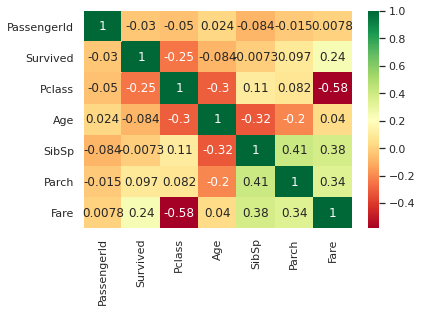

In [205]:
sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

**INFERENCES -:**


Positively corelated :
* SibSp and Parch - This means more the number of sibling or spouses, more were the parents or children.
* Parch and Fare - This means greater the number of parent or children for a particular passenger, greater were the charges/fare


Negatively correlated -:
* Pclass and Fare - This means greater the passenger class, lesser the fare. That is it would cost a passenger lesser if they were in class 3 rather than 2 or 1.
* SibSp and Age - This means that greater the number of siblings or spouses assosciated with the passenger, lesser was their age.
* Pclass and Age - This means greater the passenger class, lesser the age of the passenger. 
